### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
faturamento_loja = loja['Preço'].sum()
print(faturamento_loja)

1534509.12


In [3]:
faturamento_loja2 = loja2['Preço'].sum()
print(faturamento_loja2)

1488459.06


In [4]:
faturamento_loja3 = loja3['Preço'].sum()
print(faturamento_loja3)

1464025.03


In [5]:
faturamento_loja4 = loja4['Preço'].sum()
print(faturamento_loja4)

1384497.58


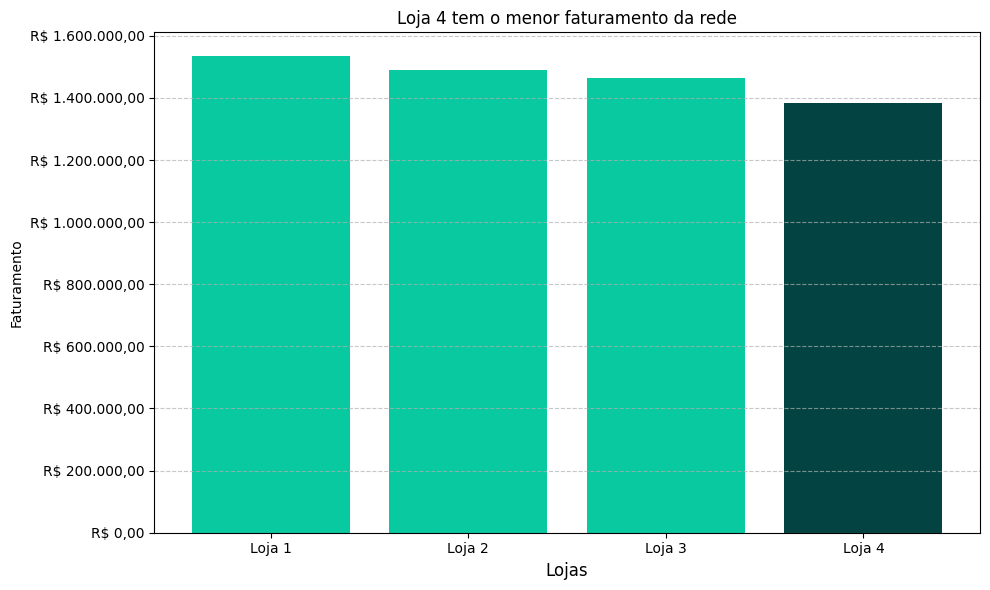

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))

analise_faturamento = {
    'Loja 1': faturamento_loja,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

colors = ['#08C99F', '#08C99F', '#08C99F', '#034442']

plt.bar(analise_faturamento.keys(), analise_faturamento.values(), color=colors)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento', )
plt.title('Loja 4 tem o menor faturamento da rede')

def currency_formatter(x, pos):
    return f'R$ {x:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))
plt.ylim(ymin=0) # Adiciona o zero no eixo Y

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 4))

plt.show()

# 2. Vendas por Categoria

In [7]:
categoria_do_produto = loja['Categoria do Produto'].value_counts()
print(categoria_do_produto)

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


In [8]:
categoria_do_produto = loja2['Categoria do Produto'].value_counts()
print(categoria_do_produto)

Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


In [9]:
categoria_do_produto = loja3['Categoria do Produto'].value_counts()
print(categoria_do_produto)

Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64


In [10]:
categoria_do_produto = loja4['Categoria do Produto'].value_counts()
print(categoria_do_produto)

Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

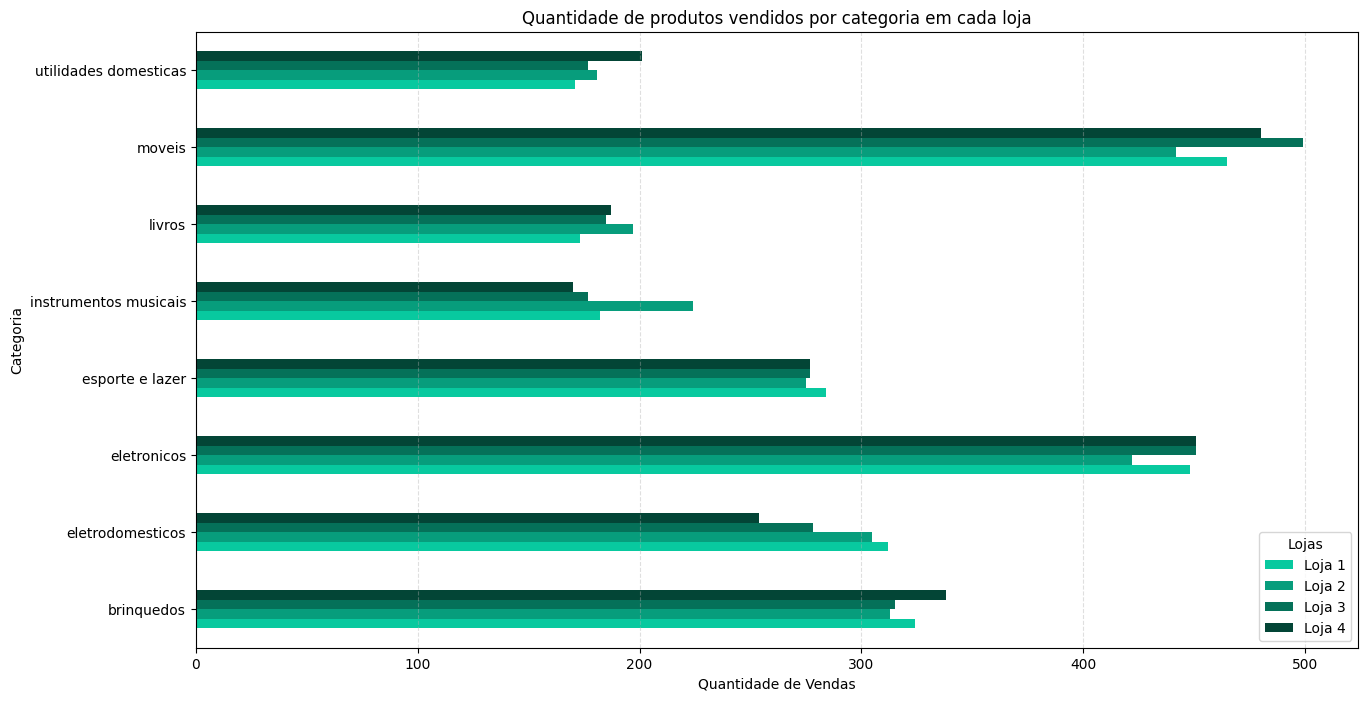

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

cat1 = loja['Categoria do Produto'].value_counts()
cat2 = loja2['Categoria do Produto'].value_counts()
cat3 = loja3['Categoria do Produto'].value_counts()
cat4 = loja4['Categoria do Produto'].value_counts()

df_categorias = pd.DataFrame({
    'Loja 1': cat1,
    'Loja 2': cat2,
    'Loja 3': cat3,
    'Loja 4': cat4,
}).fillna(0)

cores_verdes = [
    "#08C99F",
    "#079D7C",
    "#057159",
    "#034536"
]

plt.figure(figsize=(15,8))

df_categorias.plot(
    kind='barh',
    figsize=(15,8),
    color=cores_verdes
)

plt.title("Quantidade de produtos vendidos por categoria em cada loja")
plt.ylabel("Categoria")
plt.xlabel("Quantidade de Vendas")
plt.xticks(rotation=0)
plt.legend(title="Lojas")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()


# 3. Média de Avaliação das Lojas


In [12]:
media_avaliacao_loja = loja['Avaliação da compra'].mean()
print(media_avaliacao_loja)

3.976685036032217


In [13]:
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
print(media_avaliacao_loja2)

4.037303942348453


In [14]:
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
print(media_avaliacao_loja3)

4.048325561678677


In [15]:
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()
print(media_avaliacao_loja4)

3.9957591178965224


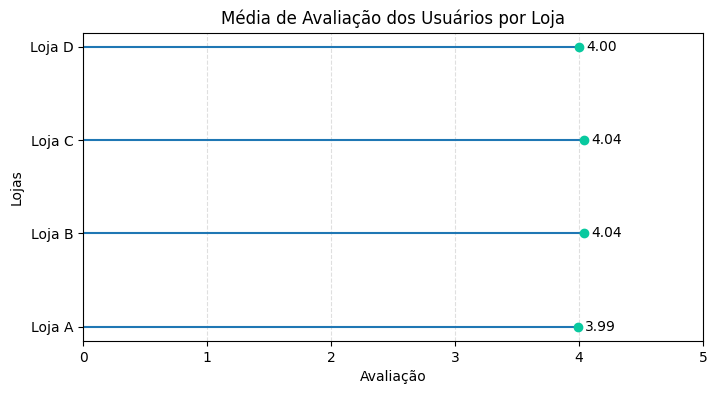

In [27]:
import matplotlib.pyplot as plt

lojas = ['Loja A', 'Loja B', 'Loja C', 'Loja D']
medias = [3.99, 4.04, 4.04, 4.0]

colors = ['#08C99F', '#079D7C', '#057159', '#034536']

plt.figure(figsize=(8, 4))

plt.hlines(y=lojas, xmin=0, xmax=medias)

plt.plot(medias, lojas, 'o', color=colors[0])

# Adiciona os números das médias nos pontos
for i, score in enumerate(medias):
    plt.annotate(f'{score:.2f}', (medias[i], lojas[i]), textcoords="offset points", xytext=(5,0), ha='left', va='center')

plt.xlim(0, 5)
plt.xlabel('Avaliação')
plt.ylabel('Lojas')
plt.title('Média de Avaliação dos Usuários por Loja')

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [17]:
produto_mais_vendido = loja['Produto'].value_counts()
print(produto_mais_vendido)

produtos_vendidos_loja1 = loja['Produto'].value_counts()

max_vendas_loja1 = produtos_vendidos_loja1.max()

produtos_mais_vendidos_loja1 = produtos_vendidos_loja1[produtos_vendidos_loja1 == max_vendas_loja1].index.tolist()

if len(produtos_mais_vendidos_loja1) > 1:
    print(f"Os produtos mais vendidos na loja 1 (com {max_vendas_loja1} unidades) são: {', '.join(produtos_mais_vendidos_loja1)}")
else:
    print(f"O produto mais vendido na loja 1 (com {max_vendas_loja1} unidades) é: {produtos_mais_vendidos_loja1[0]}")

min_vendas_loja1 = produtos_vendidos_loja1.min()

produtos_menos_vendidos_loja1 = produtos_vendidos_loja1[produtos_vendidos_loja1 == min_vendas_loja1].index.tolist()

if len(produtos_menos_vendidos_loja1) > 1:
    print(f"Os produtos menos vendidos na loja 1 (com {min_vendas_loja1} unidades) são: {', '.join(produtos_menos_vendidos_loja1)}")
else:
    print(f"O produto menos vendido na loja 1 (com {min_vendas_loja1} unidades) é: {produtos_menos_vendidos_loja1[0]}")

Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama king                      44
Cubo m

In [18]:
produto_mais_vendido = loja2['Produto'].value_counts()
print(produto_mais_vendido)

produtos_vendidos_loja2 = loja2['Produto'].value_counts()

max_vendas_loja2 = produtos_vendidos_loja2.max()

produtos_mais_vendidos_loja2 = produtos_vendidos_loja2[produtos_vendidos_loja2 == max_vendas_loja2].index.tolist()

if len(produtos_mais_vendidos_loja2) > 1:
    print(f"Os produtos mais vendidos na loja 2 (com {max_vendas_loja2} unidades) são: {', '.join(produtos_mais_vendidos_loja2)}")
else:
    print(f"O produto mais vendido na loja 2 (com {max_vendas_loja2} unidades) é: {produtos_mais_vendidos_loja2[0]}")

min_vendas_loja2 = produtos_vendidos_loja2.min()

produtos_menos_vendidos_loja2 = produtos_vendidos_loja2[produtos_vendidos_loja2 == min_vendas_loja2].index.tolist()

if len(produtos_menos_vendidos_loja2) > 1:
    print(f"Os produtos menos vendidos na loja 2 (com {min_vendas_loja2} unidades) são: {', '.join(produtos_menos_vendidos_loja2)}")
else:
    print(f"O produto menos vendido na loja 2 (com {min_vendas_loja2} unidades) é: {produtos_menos_vendidos_loja2[0]}")

Produto
Iniciando em programação       65
Micro-ondas                    62
Bateria                        61
Violão                         58
Pandeiro                       58
Secadora de roupas             57
Celular Plus X42               55
Blocos de montar               54
Guarda roupas                  54
Jogo de panelas                52
Corda de pular                 50
Lavadora de roupas             49
Cadeira de escritório          49
Geladeira                      49
Boneca bebê                    48
Carrinho controle remoto       47
Guitarra                       47
Cama box                       47
Copo térmico                   47
Modelagem preditiva            46
Bola de vôlei                  46
Jogo de copos                  46
Lava louças                    46
Kit banquetas                  45
Cama king                      45
Bicicleta                      45
Mochila                        45
Cubo mágico 8x8                45
Xadrez de madeira              45
Mesa d

In [19]:
produto_mais_vendido = loja3['Produto'].value_counts()
print(produto_mais_vendido)

produtos_vendidos_loja3 = loja3['Produto'].value_counts()

max_vendas_loja3 = produtos_vendidos_loja3.max()

produtos_mais_vendidos_loja3 = produtos_vendidos_loja3[produtos_vendidos_loja3 == max_vendas_loja3].index.tolist()

if len(produtos_mais_vendidos_loja3) > 1:
    print(f"Os produtos mais vendidos na loja 3 (com {max_vendas_loja3} unidades) são: {', '.join(produtos_mais_vendidos_loja3)}")
else:
    print(f"O produto mais vendido na loja 3 (com {max_vendas_loja3} unidades) é: {produtos_mais_vendidos_loja3[0]}")

min_vendas_loja3 = produtos_vendidos_loja3.min()

produtos_menos_vendidos_loja3 = produtos_vendidos_loja3[produtos_vendidos_loja3 == min_vendas_loja3].index.tolist()

if len(produtos_menos_vendidos_loja3) > 1:
    print(f"Os produtos menos vendidos na loja 3 (com {min_vendas_loja3} unidades) são: {', '.join(produtos_menos_vendidos_loja3)}")
else:
    print(f"O produto menos vendido na loja 3 (com {min_vendas_loja3} unidades) é: {produtos_menos_vendidos_loja3[0]}")

Produto
Kit banquetas                  57
Mesa de jantar                 56
Cama king                      56
Jogo de panelas                55
Cômoda                         55
Smart TV                       54
Fogão                          53
Corda de pular                 53
Modelagem preditiva            53
Carrinho controle remoto       52
Lava louças                    52
Bicicleta                      52
Jogo de tabuleiro              52
Pandeiro                       51
Impressora                     50
Geladeira                      50
Bola de basquete               50
Guarda roupas                  49
Bola de vôlei                  48
Tablet ABXY                    48
Poltrona                       47
Violão                         47
Panela de pressão              47
Xadrez de madeira              47
Ciência de dados com python    46
Celular Plus X42               46
Dinossauro Rex                 46
Cadeira de escritório          46
Smartwatch                     46
Cama b

In [20]:
produto_mais_vendido = loja4['Produto'].value_counts()
print(produto_mais_vendido)

produtos_vendidos_loja4 = loja4['Produto'].value_counts()

max_vendas_loja4 = produtos_vendidos_loja4.max()

produtos_mais_vendidos_loja4 = produtos_vendidos_loja4[produtos_vendidos_loja4 == max_vendas_loja4].index.tolist()

if len(produtos_mais_vendidos_loja4) > 1:
    print(f"Os produtos mais vendidos na loja 4 (com {max_vendas_loja4} unidades) são: {', '.join(produtos_mais_vendidos_loja4)}")
else:
    print(f"O produto mais vendido na loja 4 (com {max_vendas_loja4} unidades) é: {produtos_mais_vendidos_loja4[0]}")

min_vendas_loja4 = produtos_vendidos_loja4.min()

produtos_menos_vendidos_loja4 = produtos_vendidos_loja4[produtos_vendidos_loja4 == min_vendas_loja4].index.tolist()

if len(produtos_menos_vendidos_loja4) > 1:
    print(f"Os produtos menos vendidos na loja 4 (com {min_vendas_loja4} unidades) são: {', '.join(produtos_menos_vendidos_loja4)}")
else:
    print(f"O produto menos vendido na loja 4 (com {min_vendas_loja4} unidades) é: {produtos_menos_vendidos_loja4[0]}")

Produto
Cama box                       62
Faqueiro                       59
Dashboards com Power BI        56
Cama king                      56
Carrinho controle remoto       55
Mesa de jantar                 55
Cômoda                         55
Smart TV                       54
Blocos de montar               54
Pandeiro                       52
Impressora                     50
Modelagem preditiva            50
Assistente virtual             50
Jogo de panelas                50
Bola de basquete               50
Copo térmico                   48
Celular Plus X42               48
Boneca bebê                    48
Bateria                        48
Bola de vôlei                  48
Jogo de tabuleiro              48
Micro-ondas                    48
Fogão                          47
Cubo mágico 8x8                47
Sofá retrátil                  47
Dinossauro Rex                 47
Panela de pressão              46
Jogo de copos                  46
Tablet ABXY                    45
Poltro

# 5. Frete Médio por Loja

In [21]:
media_frete_loja = loja['Frete'].mean()
print(media_frete_loja)

34.69180491551149


In [22]:
media_frete_loja2 = loja2['Frete'].mean()
print(media_frete_loja2)

33.62194065817927


In [23]:
media_frete_loja3 = loja3['Frete'].mean()
print(media_frete_loja3)

33.07446427411743


In [24]:
media_frete_loja4 = loja4['Frete'].mean()
print(media_frete_loja4)

31.278997081841727


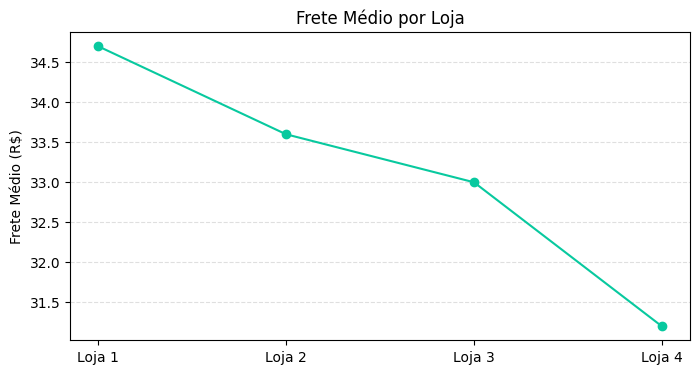

In [25]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
frete_medio = [34.7, 33.6, 33.0, 31.2]

colors=['#08C99F']

plt.figure(figsize=(8, 4))
plt.plot(lojas, frete_medio, marker='o', color=colors[0]) # Fixed: Changed color=colors to color=colors[0]

plt.ylabel('Frete Médio (R$)')
plt.title('Frete Médio por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

# Relatório

### Análise de Desempenho das Lojas do Sr. João

### 1. Introdução

Após uma análise detalhada dos principais indicadores de desempenho das lojas pertencentes ao Sr. João, este relatório tem como objetivo identificar qual unidade apresenta menor potencial de crescimento e, portanto, deve ser considerada para venda. Foram avaliados os seguintes aspectos: faturamento, categorias de produtos, produtos mais e menos vendidos, avaliação média dos clientes e frete médio.

### 2. Análise dos Indicadores

#### 2.1 Faturamento

A análise do faturamento revelou que todas as lojas apresentam valores semelhantes, com pequenas variações entre si. A Loja 1 possui o maior faturamento, seguida de perto pela Loja 2. A Loja 3 apresenta desempenho muito próximo da média geral, enquanto a Loja 4 registra o menor faturamento total. Embora as diferenças não sejam expressivas, os dados indicam que a Loja 4 é a menos lucrativa entre as quatro analisadas.

#### 2.2 Categorias de Produtos

No que se refere às categorias de produtos, observou-se que cada loja possui um padrão próprio de demanda. De modo geral, lojas que comercializam uma maior variedade de categorias tendem a apresentar melhor desempenho global. Nesse aspecto, a Loja 1 se destaca por possuir uma boa distribuição de vendas em categorias fortes, como eletrodomésticos e eletrônicos, o que contribui positivamente para seus resultados.

#### 2.3 Produtos Mais e Menos Vendidos

A análise dos produtos mais e menos vendidos mostrou que todas as lojas possuem produtos líderes de venda bem definidos. A diversidade de produtos com alta saída influencia diretamente o faturamento, enquanto lojas que concentram muitos produtos de baixa demanda demonstram menor competitividade. Nesse indicador, a Loja 4 apresentou novamente desempenho inferior, com menor força quando comparada às demais.

#### 2.4 Avaliação Média dos Clientes

A satisfação dos clientes é um fator essencial para a sustentabilidade do negócio. Nesse quesito, a Loja 3 apresentou a melhor avaliação média, com nota 4,05, seguida muito de perto pela Loja 2, com 4,04. A Loja 4 obteve média de 4,00, enquanto a Loja 1 apresentou a menor avaliação, com 3,98. Esses dados indicam que as Lojas 2 e 3 se destacam positivamente em termos de satisfação dos clientes, enquanto a Loja 1 apresenta o pior desempenho nesse indicador.

#### 2.5 Frete Médio

A análise do frete médio por loja mostrou que a Loja 1 possui o frete mais elevado, com valor médio de 34,69 reais. As Lojas 2 e 3 apresentaram valores intermediários, de 33,62 reais e 33,07 reais, respectivamente. A Loja 4 registrou o menor frete médio, de 31,28 reais. Embora um frete mais baixo possa representar um atrativo para os clientes, esse fator não se traduziu em melhor desempenho financeiro para a Loja 4, podendo inclusive impactar negativamente suas margens de lucro, dependendo da política comercial adotada.

### 3. Conclusão e Recomendação

Com base na análise conjunta de todos os indicadores — faturamento, categorias e produtos vendidos, avaliação dos clientes e frete médio — a recomendação é que o Sr. João venda a **Loja 4**. Essa unidade apresenta o menor faturamento, desempenho apenas mediano em avaliação dos clientes, menor força em categorias e produtos líderes e não conseguiu converter o frete mais baixo em vantagem competitiva.

Em contrapartida, a Loja 1 se destaca pelo maior faturamento, a Loja 2 apresenta bom equilíbrio entre faturamento e avaliação dos clientes, e a Loja 3 possui a melhor avaliação média, demonstrando maior potencial de crescimento. Dessa forma, manter as Lojas 1, 2 e 3 mostra-se uma decisão mais vantajosa do ponto de vista estratégico e financeiro.